# Tensorflow and Keras

In [2]:
import numpy as np
from matplotlib import pyplot as plt


# This is always a good idea
%load_ext autoreload
%autoreload 2
    
from src.student_caller import one_random_student, three_random_students
from src.student_list import student_first_names
import warnings
warnings.filterwarnings('ignore')

## Modeling

Let's review some modeling concepts we've used to date with [this quick exercise](https://forms.gle/yrPxUp2Xj4R9FeyEA)


We do this to remind ourselves that the basic components of good modeling practice, and even the methods themselves, are _the same_ with Neural Nets as that are with _sklearn_ or _statsmodels_.

The above exercise uses only one train-test split, but is still useful.  We will be using train, validation, test in this notebook, for good practice.

## Objectives:
- Compare pros and cons of Keras vs TensorFlow
- hands on practice coding a neural network

In [3]:
import keras

Wait a second, what is that warning? 
`Using TensorFlow backend.`

<img align =left src="img/keras.png"><br>
### Keras is an API

Coded in Python, that can be layered on top of many different back-end processing systems.

![kerasback](img/keras_tf_theano.png)

While each of these systems has their own coding methods, Keras abstracts from that in streamlined pythonic manner we are used to seeing in other python modeling libraries.

Keras development is backed primarily by Google, and the Keras API comes packaged in TensorFlow as tf.keras. Additionally, Microsoft maintains the CNTK Keras backend. Amazon AWS is maintaining the Keras fork with MXNet support. Other contributing companies include NVIDIA, Uber, and Apple (with CoreML).

Theano has been discontinued.  The last release was 2017, but can still be used.

We will use TensorFlow, as it is the most popular. TensorFlow became the most used Keras backend, and  eventually integrated Keras into via the tf.keras submodule of TensorFlow.  

## Wait, what's TensorFlow?


## Let's start with tensors

## Tensors are multidimensional matricies

![tensor](img/tensors.png)

### TensorFlow manages the flow of matrix math

That makes neural network processing possible.

![cat](img/cat-tensors.gif)

For our numbers dataset, our tensors from the sklearn dataset were originally tensors of the shape 8x8, i.e.64 pictures.  Remember, that was with black and white images.

For image processing, we are often dealing with color.

In [4]:
from sklearn.datasets import load_sample_images
image = load_sample_images()['images'][0]

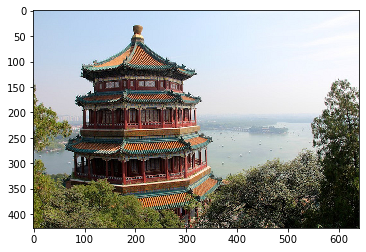

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

imgplot = plt.imshow(image)

In [6]:
image.shape

(427, 640, 3)

What do the dimensions of our image above represent?

In [7]:
one_random_student(student_first_names)

Andrew


Tensors with higher numbers of dimensions have a higher **rank**, in the language of TensorFlow.

A matrix with rows and columns only, like the black and white numbers, are **rank 2**.

A matrix with a third dimension, like the color pictures above, are **rank 3**.

When we flatten an image by stacking the rows in a column, we are decreasing the rank. 

In [7]:
flat_image = image.reshape(-1,1)

When we unrow a column, we increase its rank.

In [8]:
unrowed = flat_image.reshape(427,640, -1)

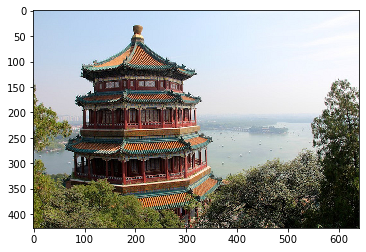

In [9]:
imgplot = plt.imshow(unrowed)


## TensorFLow has more levers and buttons, but Keras is more user friendly

Coding directly in **Tensorflow** allows you to tweak more parameters to optimize performance. The **Keras** wrapper makes the code more accessible for developers prototyping models.

![levers](img/levers.jpeg)

### Keras, an API with an intentional UX

- Deliberately design end-to-end user workflows
- Reduce cognitive load for your users
- Provide helpful feedback to your users

[full article here](https://blog.keras.io/user-experience-design-for-apis.html)<br>
[full list of why to use Keras](https://keras.io/why-use-keras/)

### A few comparisons

While you **can leverage both**, here are a few comparisons.

| Comparison | Keras | Tensorflow|
|------------|-------|-----------|
| **Level of API** | high-level API | High and low-level APIs |
| **Speed** |  can *seem* slower |  is a bit faster |
| **Language architecture** | simple architecture, more readable and concise | straight tensorflow is a bit more complex |
| **Debugging** | less frequent need to debug | difficult to debug |
| **Datasets** | usually used for small datasets | high performance models and large datasets that require fast execution|

This is also a _**non-issue**_ - as you can leverage tensorflow commands within keras and vice versa. If Keras ever seems slower, it's because the developer's time is more expensive than the GPUs. Keras is designed with the developer in mind. 


[reference link](https://www.edureka.co/blog/keras-vs-tensorflow-vs-pytorch/)

# Now let's get our feet wet

Let's import the numbers dataset we used this morning.

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()
X = digits.data
y = digits.target


#### Getting data ready for modeling
**Preprocessing**:

- use train_test_split to create X_train, y_train, X_test, and y_test
- Split training data into train and validation sets.
- Scale the pixel intensity to a value between 0 and 1.
- Scale the pixel intensity to a value between 0 and 1.


Scaling our input variables will help speed up our neural network [see 4.3](http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf)

Since our minimum intensity is 0, we can normalize the inputs by dividing each value by the max value (16). 

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train, random_state=42, test_size=.2)
X_t, X_val, X_test = X_t/16, X_val/16, X_test/16


Now that our data is ready, let's load in the keras Sequential class.  

In this lesson, we are only proceeding with feed forward models.  Our network proceeds layer by layer in sequence.

Sequential refers to a sequence of layers that feed directly into one another with exactly [one input tensor and one output tensor](https://www.tensorflow.org/guide/keras/sequential_model)

In [210]:
# Import the Sequential model from the models module

# Instantiate an instance of the Sequential model

Now we want to specify the type for our first hidden layer.

To begin, we will only deal with dense layers.  Remember, dense means fully connected.  Every neuron passes a signal to every neuron in the next layer.

In [212]:
# Import Dense from keras.layers


As we will see, building neural networks is a highly empirical process.  There are numerous architectural choices to be made whose impact is hard to predict.  One has to proceed systematically, keeping track of the changes to the architure made along the way, tweeking the hyperparameters and layers until a good model is found.

That being said, some aspects of our model require specific components. 

For our first hidden layer, we need to specify both the number of neurons in the layer, the activation function, and the dimensions of our input.

Out of those three choices, which is non-negotiable?

In [12]:
one_random_student(student_first_names)

Elena


In [13]:
# We use model.add to add a layer.  Pass Dense() to model.add, with the parameters specified above
# hints: 'sigmoid', 'input_dim'



Next, we have to specify our output layer.

To do so, we have to choose an appropriate activation function which mirrors the sample space of our potential outcomes.

What activation should we use for our output layer?

In [14]:
one_random_student(student_first_names)

Karim


In [ ]:
# add another layer with the appropriate units and activation function. 
# We use the same syntax as the first hidden layer


Lastly, for this simple model, we have to define a loss function, a metric, and an optimizer.

Optimizers are functions which update our weights in smart ways instead of treating all parameters equaly. Adam, a popular optimizer, calculates an individual learning rate for each parameter. Here is a list of available optimizers in Keras: [optimizers](https://keras.io/api/optimizers/)

We specify these parameters in the compile method.

Looking back at this morning's lecture, what loss function should we use?

In [15]:
one_random_student(student_first_names)

Sam


Now we can fit our model in a similar way as we did our sklearn models, using a .fit method.

Before we do so, we have to convert out target values with a One Hot Encoder, which is the form Keras requires. 

In [16]:
# pass y_t.reshape(-1,1) into the fit_transform method of a OneHotEncoder

y_t_ohe = None

In [17]:
# pass X_t and y_t_ohe to the model's fit method


How did we do? Keras behaves in a way which makes replication across computers difficult, even if we were to add a random seed.  In other words may get slightly varying results.

The model once fit now has the ability to both predict and predict_classes

In [18]:
# Try both methods out with X_val

Instead of checking the performance on val each time with the above methods, we can score our validation data along with the training data by passing it as a tuple as the validation_data parameter in our .fit 

But first, we have to transform y_val like we did y_t.

In [ ]:
# Transform y_val with the ohe object from above

In [ ]:
# Now, call the .fit() method again with the validation data.

How did we do on the validation data?

Now that we have our input and output layers set, let's try to boost our accuracy.

To begin, let's allow our algorithm to train for a longer.  To do so, we increase the epochs using the `epochs` parameter in .fit(). Let's change it to 5.

In [ ]:
# Increase our epochs to 5

Now our loss is going down and accuracy is going up a bit. 

Let's plot our loss across epochs. In order to do that, we have to store the results of our model.


In [ ]:
# instead of simply calling model.fit(), assign it to a variable results

results = None

In [ ]:
# Now take a look at results.history


We can track the loss and accuracy from each epoch to get a sense of our model's progress.

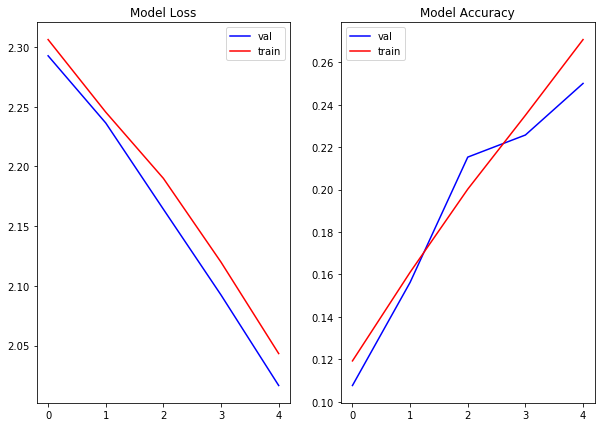

In [27]:
# We can now plot our loss and accuracy against results.epoch

def plot_results(results):
    
    '''
    After running a model, plot the training and validation
    scores for both loss and accuracy.
    '''
    
    val_loss = results.history['val_loss']
    train_loss = results.history['loss']

    val_accuracy = results.history['val_accuracy']
    train_accuracy = results.history['accuracy']
    
    fig, ax = plt.subplots(1,2, figsize=(10,7))

    ax[0].plot(results.epoch, val_loss, c='b', label='val')
    ax[0].plot(results.epoch, train_loss, c='r', label='train')
    ax[0].legend()
    ax[0].set_title('Model Loss')

    ax[1].plot(results.epoch, val_accuracy, c='b', label='val')
    ax[1].plot(results.epoch, train_accuracy, c='r', label='train')
    ax[1].set_title('Model Accuracy')

    ax[1].legend()
    

plot_results(results)

Our goal in modeling is to minimize the loss while maximizing accuracy. Remember, our models don't actually optimize for the metric we assign: they learn by minimizing the loss.  We can get a sense as to whether our model has converged on a minimim by seeing whether our loss has stopped decreasing.  The plots of epochs vs loss will level off.

With this goal in mind, let's start testing out some different architectures and parameters.
Remember, this is an empirical process.  We experiment with educated guesses as to what may improve our model's performance.

A first logical step would be to allow our model to learn for a longer.

In [25]:
# Here is the current state of our model, along with all the code we need to make our model run.

# Let's see what happens if we up our fit to 10 epochs

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_t_ohe = ohe.fit_transform(y_t.reshape(-1,1))
y_val_ohe = ohe.transform(y_val.reshape(-1,1))

model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=5)


Train on 1149 samples, validate on 288 samples
Epoch 1/5
1149/1149 [==============================] - 0s 395us/step - loss: 2.3062 - accuracy: 0.1192 - val_loss: 2.2926 - val_accuracy: 0.1076
Epoch 2/5
1149/1149 [==============================] - 0s 44us/step - loss: 2.2454 - accuracy: 0.1610 - val_loss: 2.2364 - val_accuracy: 0.1562
Epoch 3/5
1149/1149 [==============================] - 0s 42us/step - loss: 2.1900 - accuracy: 0.2002 - val_loss: 2.1641 - val_accuracy: 0.2153
Epoch 4/5
1149/1149 [==============================] - 0s 42us/step - loss: 2.1198 - accuracy: 0.2350 - val_loss: 2.0923 - val_accuracy: 0.2257
Epoch 5/5
1149/1149 [==============================] - 0s 45us/step - loss: 2.0433 - accuracy: 0.2707 - val_loss: 2.0166 - val_accuracy: 0.2500


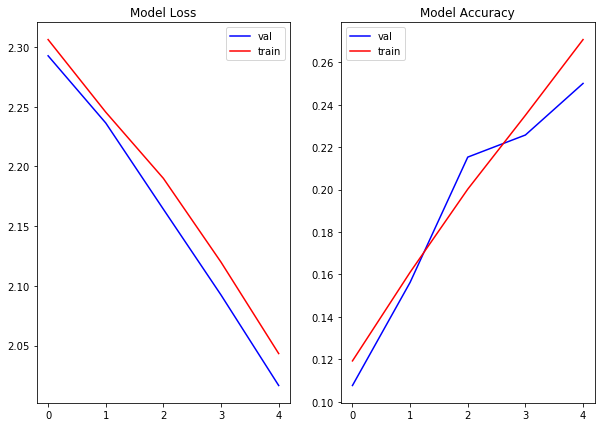

In [28]:
plot_results(results)

Instead of adding more epochs, let's deepen our network by adding another hidden layer. It is a good idea to try out deep networks, since we know that successive layers find increasingly complex patterns.

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 0s 397us/step - loss: 2.3142 - accuracy: 0.1036 - val_loss: 2.2872 - val_accuracy: 0.1111
Epoch 2/10
1149/1149 [==============================] - 0s 45us/step - loss: 2.2807 - accuracy: 0.1401 - val_loss: 2.2596 - val_accuracy: 0.1458
Epoch 3/10
1149/1149 [==============================] - 0s 92us/step - loss: 2.2464 - accuracy: 0.1567 - val_loss: 2.2214 - val_accuracy: 0.1493
Epoch 4/10
1149/1149 [==============================] - 0s 40us/step - loss: 2.2004 - accuracy: 0.1680 - val_loss: 2.1620 - val_accuracy: 0.1806
Epoch 5/10
1149/1149 [==============================] - 0s 46us/step - loss: 2.1308 - accuracy: 0.2124 - val_loss: 2.0810 - val_accuracy: 0.2465
Epoch 6/10
1149/1149 [==============================] - 0s 42us/step - loss: 2.0476 - accuracy: 0.2628 - val_loss: 1.9976 - val_accuracy: 0.2847
Epoch 7/10
1149/1149 [==============================] - 0s 41us/step - loss: 1.968

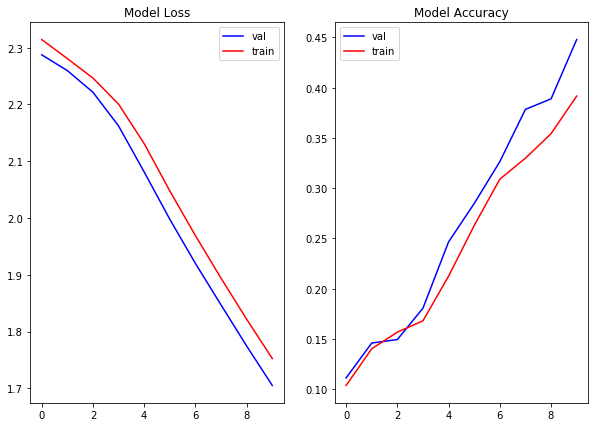

In [33]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_dim=64))
# add another Dense layer. Try out 6 units and 'relu' activation
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)
plot_results(results)

In [ ]:
Try out the tanh activation function

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 1s 492us/step - loss: 2.2898 - accuracy: 0.1253 - val_loss: 2.2476 - val_accuracy: 0.1562
Epoch 2/10
1149/1149 [==============================] - 0s 53us/step - loss: 2.1988 - accuracy: 0.2037 - val_loss: 2.1669 - val_accuracy: 0.2083
Epoch 3/10
1149/1149 [==============================] - 0s 52us/step - loss: 2.1159 - accuracy: 0.2681 - val_loss: 2.0854 - val_accuracy: 0.2812
Epoch 4/10
1149/1149 [==============================] - 0s 51us/step - loss: 2.0309 - accuracy: 0.3281 - val_loss: 2.0007 - val_accuracy: 0.3299
Epoch 5/10
1149/1149 [==============================] - 0s 56us/step - loss: 1.9428 - accuracy: 0.3681 - val_loss: 1.9119 - val_accuracy: 0.3854
Epoch 6/10
1149/1149 [==============================] - 0s 57us/step - loss: 1.8525 - accuracy: 0.4125 - val_loss: 1.8265 - val_accuracy: 0.4132
Epoch 7/10
1149/1149 [==============================] - 0s 48us/step - loss: 1.765

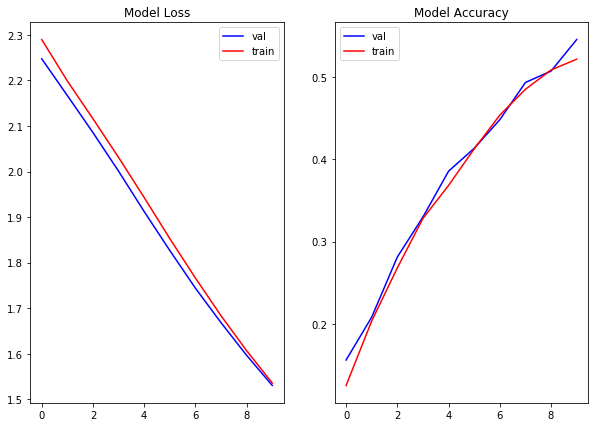

In [35]:
model = Sequential()
# try out the tanh activation
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)
plot_results(results)

Without knowing, we have been performing batch gradient descent.  Let's try out mini-batch gradient descent.

To do so, we add a batch size to our fit.

As a favorite blogger, Jason Brownlee suggests:

Mini-batch sizes, commonly called “batch sizes” for brevity, are often tuned to an aspect of the computational architecture on which the implementation is being executed. Such as a power of two that fits the memory requirements of the GPU or CPU hardware like 32, 64, 128, 256, and so on. [source](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/)

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 1s 546us/step - loss: 2.3237 - accuracy: 0.1123 - val_loss: 2.2307 - val_accuracy: 0.1458
Epoch 2/10
1149/1149 [==============================] - 0s 72us/step - loss: 2.1908 - accuracy: 0.2480 - val_loss: 2.1468 - val_accuracy: 0.3125
Epoch 3/10
1149/1149 [==============================] - 0s 50us/step - loss: 2.1004 - accuracy: 0.3342 - val_loss: 2.0688 - val_accuracy: 0.3264
Epoch 4/10
1149/1149 [==============================] - 0s 48us/step - loss: 2.0148 - accuracy: 0.3638 - val_loss: 1.9908 - val_accuracy: 0.3542
Epoch 5/10
1149/1149 [==============================] - 0s 47us/step - loss: 1.9311 - accuracy: 0.3873 - val_loss: 1.9171 - val_accuracy: 0.3576
Epoch 6/10
1149/1149 [==============================] - 0s 46us/step - loss: 1.8484 - accuracy: 0.4091 - val_loss: 1.8410 - val_accuracy: 0.3958
Epoch 7/10
1149/1149 [==============================] - 0s 52us/step - loss: 1.769

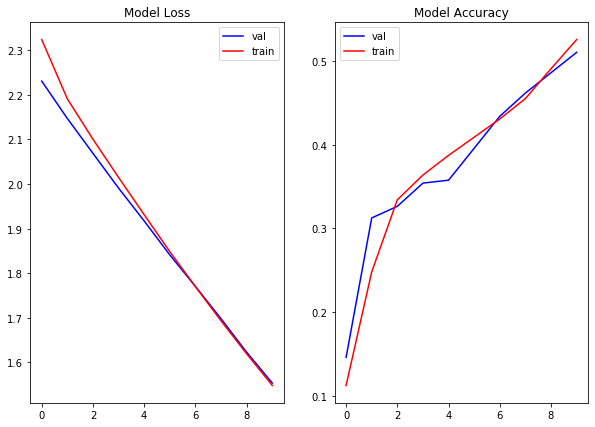

In [37]:
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
# Add a batch_size to our fit. Try 32
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)
plot_results(results)

We can also try true stochastic gradient descent by specifying 1 as the batch size.

Train on 1149 samples, validate on 288 samples
Epoch 1/10
1149/1149 [==============================] - 2s 2ms/step - loss: 1.9445 - accuracy: 0.3725 - val_loss: 1.6221 - val_accuracy: 0.4688
Epoch 2/10
1149/1149 [==============================] - 2s 1ms/step - loss: 1.4287 - accuracy: 0.5379 - val_loss: 1.2796 - val_accuracy: 0.6181
Epoch 3/10
1149/1149 [==============================] - 2s 1ms/step - loss: 1.1734 - accuracy: 0.6171 - val_loss: 1.0605 - val_accuracy: 0.6875
Epoch 4/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.9853 - accuracy: 0.6806 - val_loss: 0.9026 - val_accuracy: 0.7118
Epoch 5/10
1149/1149 [==============================] - 2s 1ms/step - loss: 0.8380 - accuracy: 0.7337 - val_loss: 0.7665 - val_accuracy: 0.7778
Epoch 6/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.7289 - accuracy: 0.7755 - val_loss: 0.6552 - val_accuracy: 0.7951
Epoch 7/10
1149/1149 [==============================] - 2s 2ms/step - loss: 0.6394 - accu

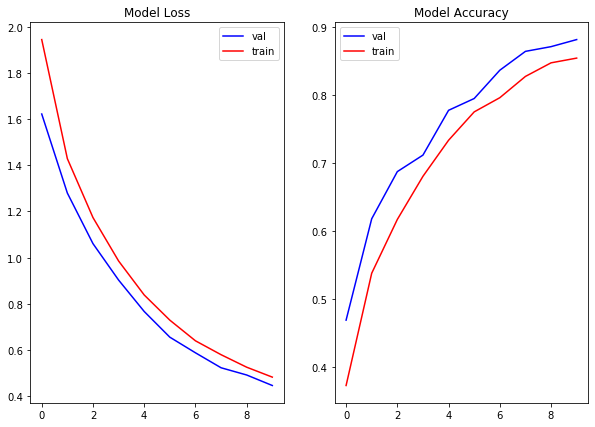

In [41]:
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="SGD", loss='categorical_crossentropy', metrics=['accuracy'])
# for Stochastic gradient descent, add a batch size of 1
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=10)
plot_results(results)

Since a SGD batchsize seems to work well, but takes a relatively long time, let's try a slightly bigger batch size of 5 and boost the epochs to 50.  Hopefully, this will allow us to achieve similarly good results as SGD, but in a reasonable amount of time.

In [ ]:
model = Sequential()
opt = keras.optimizers.Adam(learning_rate=0.01)

model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# Change batch size to 5 and epochs to 50
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=50, batch_size=5)
plot_results(results)

Now we're talking.  We are beginnig to see a leveling off of our validation loss, indicating that we may be close to converging on a minimum.

But as you may notice, the validation loss is beginning to separate from the training loss.

Let's run this a bit longer, and see what happens

Train on 1149 samples, validate on 288 samples
Epoch 1/150
1149/1149 [==============================] - 1s 826us/step - loss: 2.2632 - accuracy: 0.1593 - val_loss: 2.1374 - val_accuracy: 0.2083
Epoch 2/150
1149/1149 [==============================] - 0s 294us/step - loss: 1.9715 - accuracy: 0.3238 - val_loss: 1.8509 - val_accuracy: 0.4201
Epoch 3/150
1149/1149 [==============================] - 0s 291us/step - loss: 1.6991 - accuracy: 0.4543 - val_loss: 1.6234 - val_accuracy: 0.4514
Epoch 4/150
1149/1149 [==============================] - 0s 305us/step - loss: 1.4878 - accuracy: 0.5265 - val_loss: 1.4457 - val_accuracy: 0.5556
Epoch 5/150
1149/1149 [==============================] - 0s 289us/step - loss: 1.3155 - accuracy: 0.6075 - val_loss: 1.2916 - val_accuracy: 0.6771
Epoch 6/150
1149/1149 [==============================] - 0s 296us/step - loss: 1.1776 - accuracy: 0.6858 - val_loss: 1.1787 - val_accuracy: 0.7083
Epoch 7/150
1149/1149 [==============================] - 0s 312us/step 

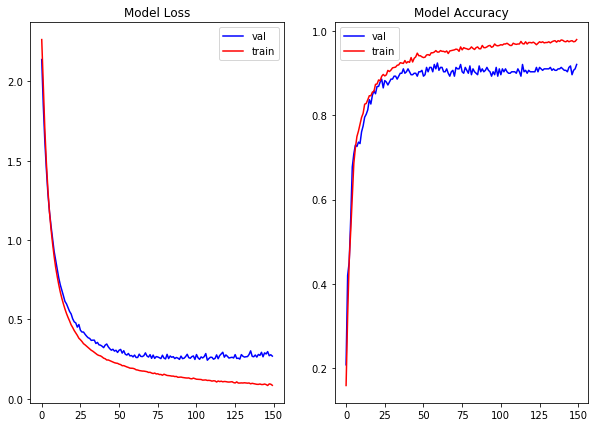

In [44]:
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
# Up the epochs to 150
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=50, batch_size=5)
plot_results(results)

If this model is behaving at all like it was for me last night, we are beginning to experience some overfitting.  Your val loss may have even started increasing.

# Regularization

In order to combat overfitting, we have several regularization techniques to employ.  In the present case, the most intuitive choice is early stopping.

## Early Stopping
For early stopping, we allow our model to run until some condition is met. 

One practical way to do this is monitoring the validation loss. 

We can set-up early stopping to stop our model whenever it sees an increase in validation loss by setting min_delta to a very low number and patience to 0.  Increasing the patience waits a specified number of epochs without improvement of the monitored value.  Increasing the patience in effect allows for abberations protecting against the case that a given epoch, by random chance, led to a worse metric.  If we see a decrease in score across multiple epochs in a row, we can be fairly certain more training of our network will only result in overfitting.

In [46]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=0, verbose=1,
                           mode='min')

Train on 1149 samples, validate on 288 samples
Epoch 1/500
1149/1149 [==============================] - 1s 661us/step - loss: 2.2686 - accuracy: 0.1836 - val_loss: 2.2358 - val_accuracy: 0.1979
Epoch 2/500
1149/1149 [==============================] - 0s 60us/step - loss: 2.1685 - accuracy: 0.2054 - val_loss: 2.1378 - val_accuracy: 0.1944
Epoch 3/500
1149/1149 [==============================] - 0s 64us/step - loss: 2.0745 - accuracy: 0.2385 - val_loss: 2.0542 - val_accuracy: 0.2535
Epoch 4/500
1149/1149 [==============================] - 0s 60us/step - loss: 1.9907 - accuracy: 0.3281 - val_loss: 1.9722 - val_accuracy: 0.3229
Epoch 5/500
1149/1149 [==============================] - 0s 64us/step - loss: 1.9189 - accuracy: 0.3803 - val_loss: 1.9024 - val_accuracy: 0.3681
Epoch 6/500
1149/1149 [==============================] - 0s 78us/step - loss: 1.8542 - accuracy: 0.4221 - val_loss: 1.8365 - val_accuracy: 0.3993
Epoch 7/500
1149/1149 [==============================] - 0s 62us/step - loss

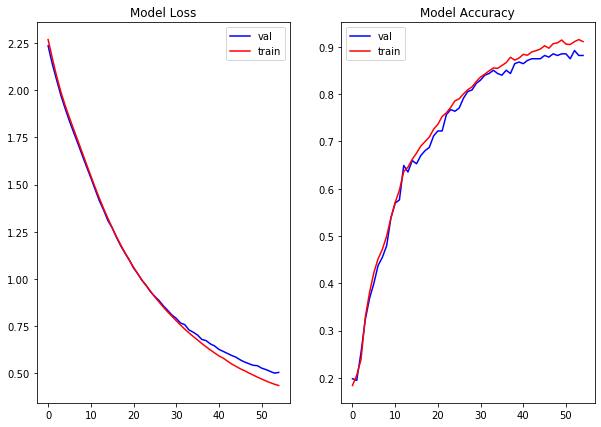

In [51]:
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=0, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=500, batch_size=32, callbacks=[early_stop])
plot_results(results)

In [53]:
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=5, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=500, batch_size=32, callbacks=[early_stop])
plot_results(results)

Train on 1149 samples, validate on 288 samples
Epoch 1/500
1149/1149 [==============================] - 1s 933us/step - loss: 2.2577 - accuracy: 0.1810 - val_loss: 2.1314 - val_accuracy: 0.2569
Epoch 2/500
1149/1149 [==============================] - 0s 321us/step - loss: 1.9868 - accuracy: 0.3664 - val_loss: 1.8392 - val_accuracy: 0.4236
Epoch 3/500
1149/1149 [==============================] - 0s 319us/step - loss: 1.6935 - accuracy: 0.4682 - val_loss: 1.5572 - val_accuracy: 0.5799
Epoch 4/500
1149/1149 [==============================] - 0s 331us/step - loss: 1.4467 - accuracy: 0.5666 - val_loss: 1.3496 - val_accuracy: 0.6250
Epoch 5/500
1149/1149 [==============================] - 0s 313us/step - loss: 1.2712 - accuracy: 0.6232 - val_loss: 1.2278 - val_accuracy: 0.6493
Epoch 6/500
1149/1149 [==============================] - 0s 324us/step - loss: 1.1432 - accuracy: 0.6588 - val_loss: 1.1039 - val_accuracy: 0.6632
Epoch 7/500
1149/1149 [==============================] - 0s 368us/step 

KeyboardInterrupt: 

# Drop Out Layers

Although the final two regularization techniques make less sense in our present case, since overfitting only occurs late in our training, we have two other common regularization techniques.

We can add dropout layers to our model.  

We can specify a dropout layer in keras, which randomly shuts off different nodes during training.

![drop_out](img/drop_out.png)

Train on 1149 samples, validate on 288 samples
Epoch 1/500
1149/1149 [==============================] - 1s 788us/step - loss: 2.2918 - accuracy: 0.1001 - val_loss: 2.2451 - val_accuracy: 0.1562
Epoch 2/500
1149/1149 [==============================] - 0s 71us/step - loss: 2.2278 - accuracy: 0.1819 - val_loss: 2.1815 - val_accuracy: 0.2847
Epoch 3/500
1149/1149 [==============================] - 0s 72us/step - loss: 2.1704 - accuracy: 0.2350 - val_loss: 2.1127 - val_accuracy: 0.3299
Epoch 4/500
1149/1149 [==============================] - 0s 75us/step - loss: 2.1129 - accuracy: 0.2785 - val_loss: 2.0361 - val_accuracy: 0.3785
Epoch 5/500
1149/1149 [==============================] - 0s 70us/step - loss: 2.0484 - accuracy: 0.2889 - val_loss: 1.9548 - val_accuracy: 0.4306
Epoch 6/500
1149/1149 [==============================] - 0s 73us/step - loss: 1.9787 - accuracy: 0.3577 - val_loss: 1.8706 - val_accuracy: 0.4896
Epoch 7/500
1149/1149 [==============================] - 0s 65us/step - loss

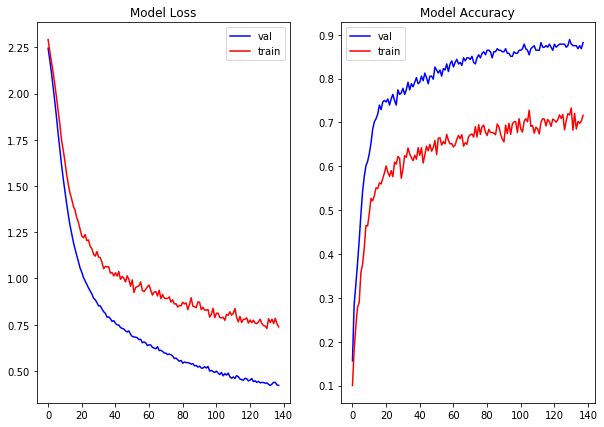

In [58]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dropout(rate=.25))
model.add(Dense(units=6, activation='tanh'))
model.add(Dense(units=10, activation='softmax'))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe), epochs=500)
plot_results(results)


We can also add L1 and L2 regularization

Train on 1149 samples, validate on 288 samples
Epoch 1/500
1149/1149 [==============================] - 1s 942us/step - loss: 2.4841 - accuracy: 0.1097 - val_loss: 2.4562 - val_accuracy: 0.1944
Epoch 2/500
1149/1149 [==============================] - 0s 47us/step - loss: 2.4421 - accuracy: 0.1793 - val_loss: 2.4219 - val_accuracy: 0.2326
Epoch 3/500
1149/1149 [==============================] - 0s 44us/step - loss: 2.4043 - accuracy: 0.2428 - val_loss: 2.3867 - val_accuracy: 0.2986
Epoch 4/500
1149/1149 [==============================] - 0s 46us/step - loss: 2.3660 - accuracy: 0.3064 - val_loss: 2.3477 - val_accuracy: 0.3611
Epoch 5/500
1149/1149 [==============================] - 0s 47us/step - loss: 2.3219 - accuracy: 0.4108 - val_loss: 2.3025 - val_accuracy: 0.4201
Epoch 6/500
1149/1149 [==============================] - 0s 51us/step - loss: 2.2731 - accuracy: 0.4682 - val_loss: 2.2509 - val_accuracy: 0.4444
Epoch 7/500
1149/1149 [==============================] - 0s 49us/step - loss

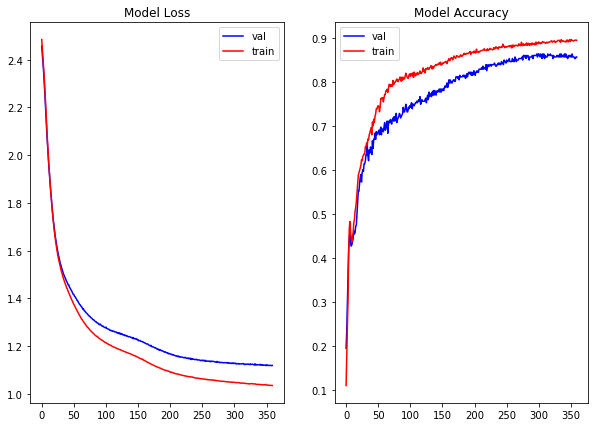

In [66]:
from keras import regularizers

from keras.layers import Dropout
model = Sequential()
model.add(Dense(units=4, activation='tanh', input_dim=64))
model.add(Dense(20 ,  activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(units=6, activation='tanh', kernel_regularizer=regularizers.l2(0.01)) )
model.add(Dense(units=10, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))
model.compile(optimizer="Adam", loss='categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-8, patience=10, verbose=1,
                           mode='min')
results = model.fit(X_t, y_t_ohe, validation_data=(X_val, y_val_ohe),
                    epochs=500, batch_size=64, callbacks=[early_stop])
plot_results(results)



In [ ]:
# need to add learning rate